In [183]:
import pandas as pd
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [184]:
init_notebook_mode(connected=True)

  <h2 style="color:gray">
    Análise Exploratória de Dados (AED)
  </h2>
  <p>
   Notebook para análise exploratória de dados acadêmicos retirados da Plataforma Nilo Peçanha. Este Notebook faz parte do meu Trabalho de Conclusão de Curso (TCC) que tem por objetivo aplicar técnicas da área de Ciências de Dados para obter um conhecimento sobre a evasão estudantil de cursos superiores nos Campi do Instituto Federal da Paraíba.
  </p>
    <p>Os dados foram obtidos no <a title="Encontre aqui" href="https://dadosabertos.mec.gov.br/pnp">Portal de dados abertos do Ministério da Educação</a> em formatos CSV.</p>
  
  <h3>Sobre os atributos da base</h3>

In [185]:
from IPython.display import display, Image
# display(Image(filename='attrs.png'))

  <b>Foi construído um Data Warehouse para armazenar os dados dos estudantes. Dessa forma, uma limpeza dos mesmos já foi realizada, bem como a modelagem dimensional em um modelo Star Schema que pode ser observado abaixo:</b>

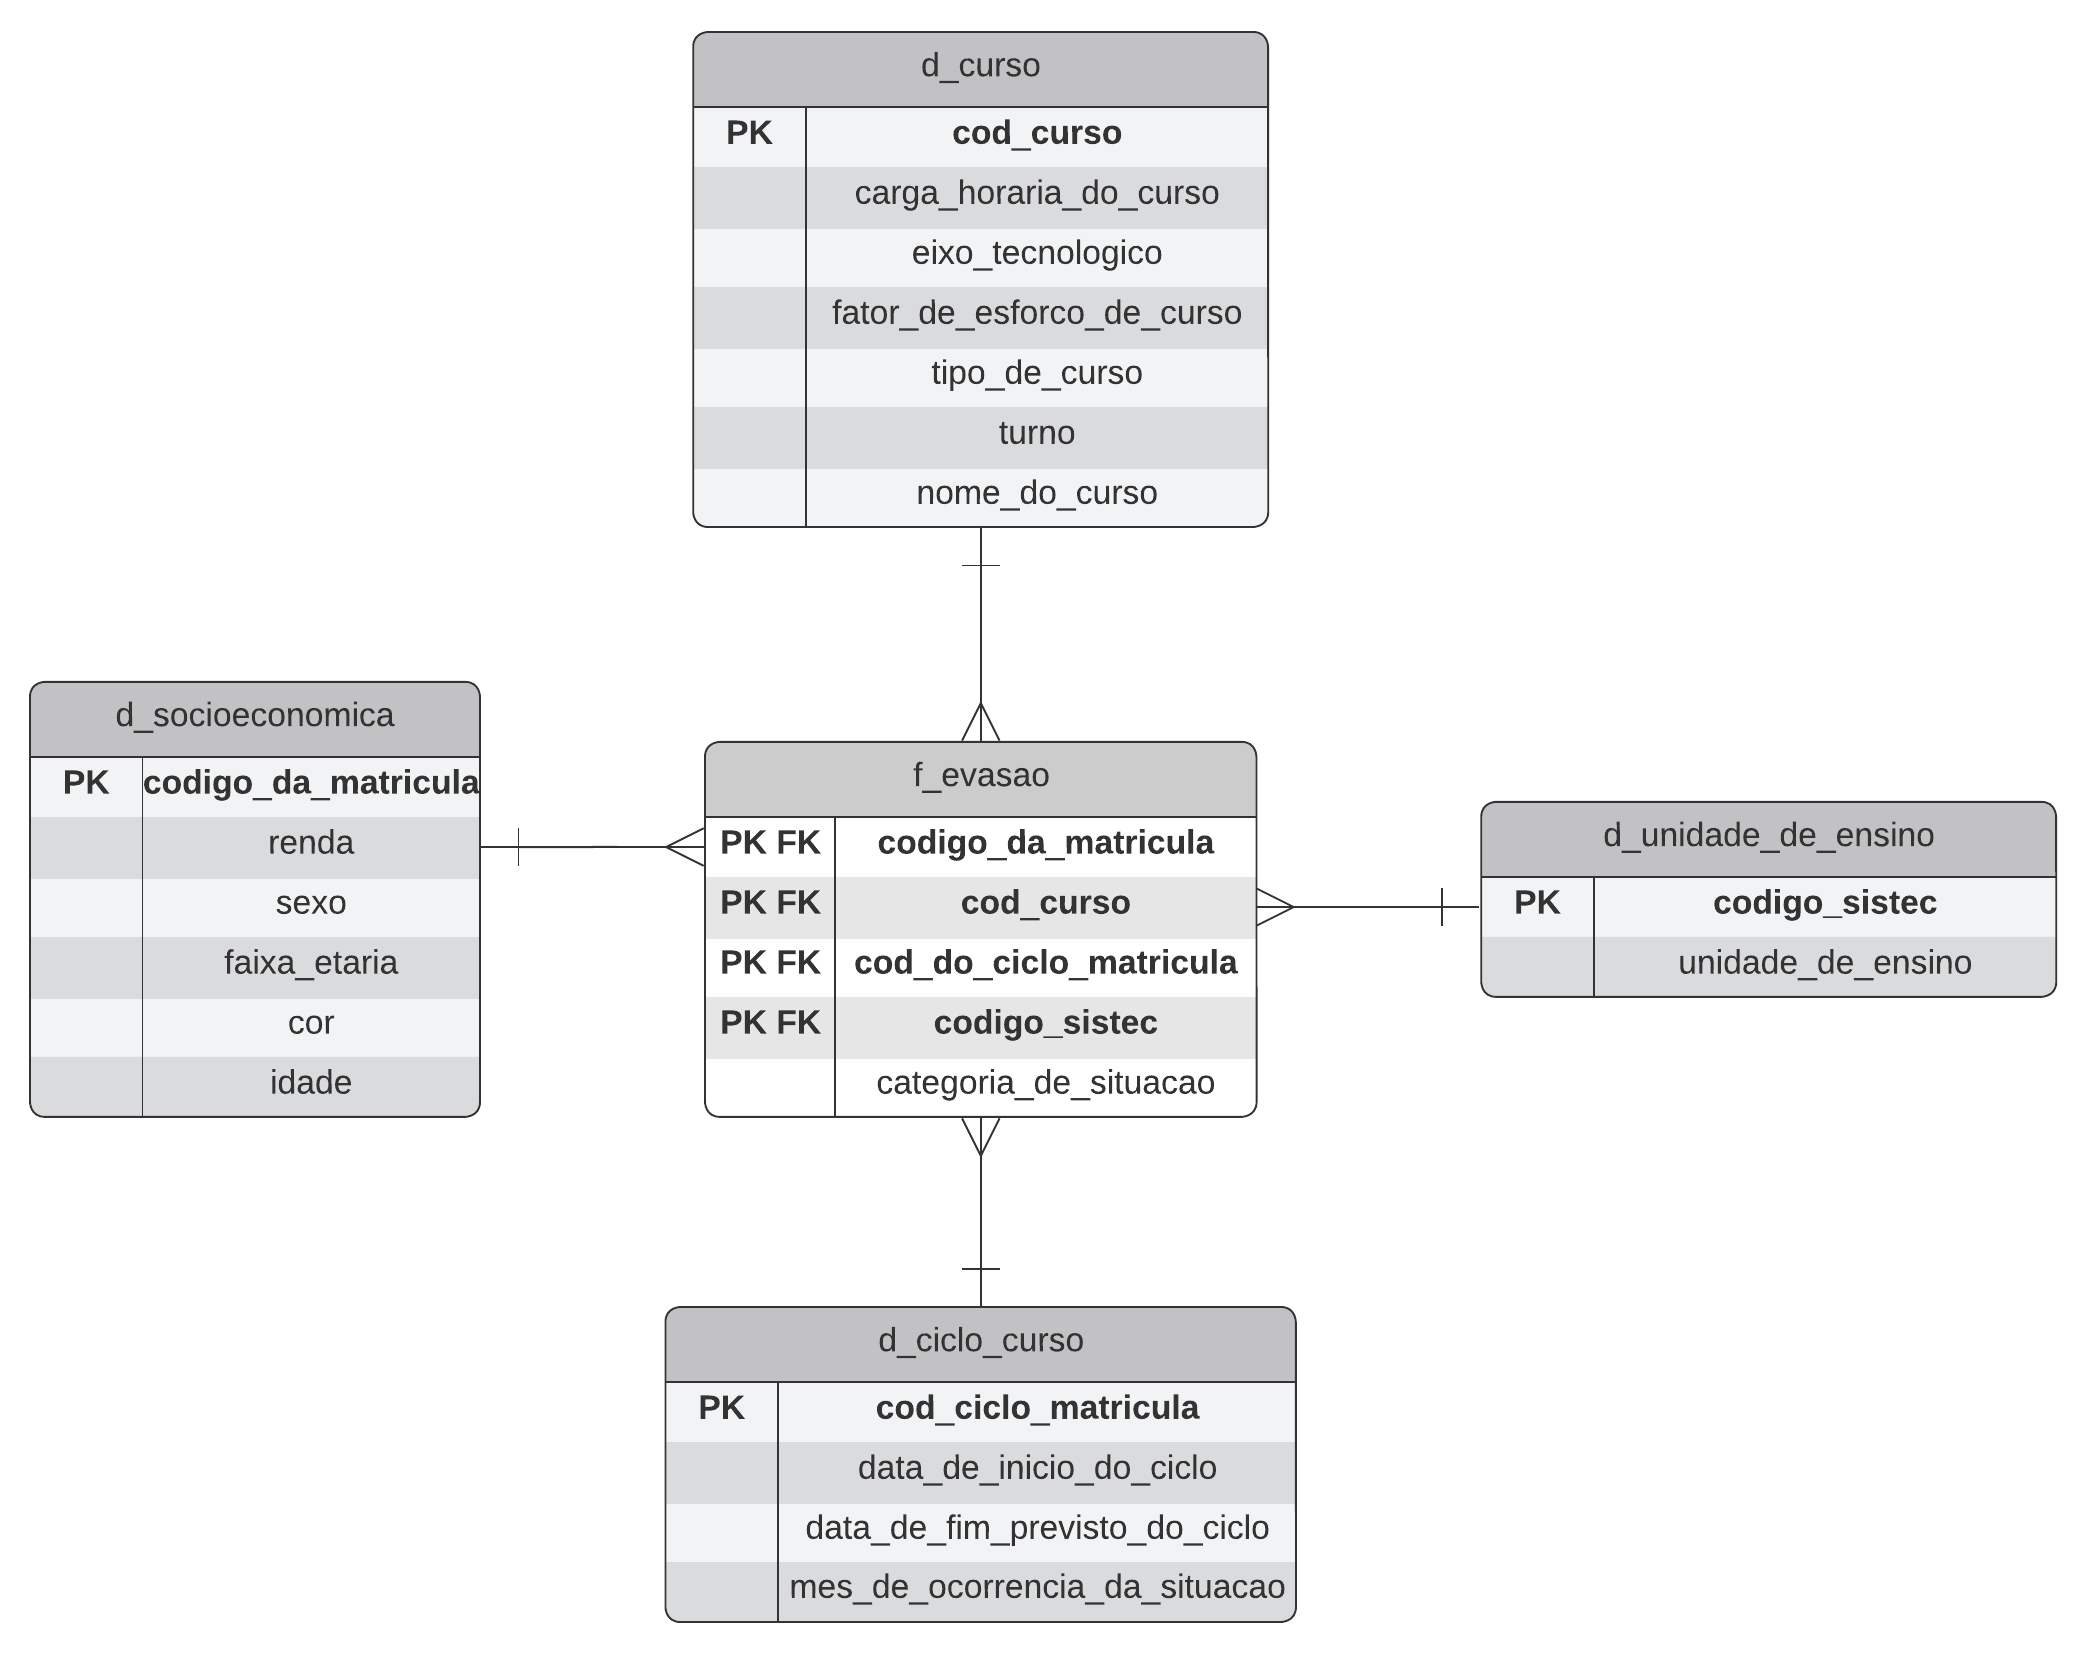

In [186]:
display(Image(filename='Diagrama-ER.png'))

Os dados foram obtidos do Data Warehouse e transformados em um arquivo csv onde foram unificados para melhor manipulação.

In [187]:
# lendo a base de dados
data = pd.read_csv('student_data.csv')
data.head()

,cod_curso,nome_do_curso,carga_horaria_do_curso,eixo_tecnologico,fator_de_esforco_de_curso,tipo_de_curso,turno,codigo_da_matricula,codigo_do_ciclo_matricula,codigo_sistec,...,data_de_inicio_do_ciclo,data_de_fim_previsto_do_ciclo,vagas_ofertadas,mes_de_ocorrencia_da_situacao,renda,sexo,faixa_etaria,idade,cor,unidade_de_ensino
0,18,engenharia mecanica,4147,controle e processos industriais,1.07,bacharelado,integral,92150225,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"0,5<RFP<=1,0",F,20-24,24,parda,Campus João Pessoa
1,18,engenharia mecanica,4147,controle e processos industriais,1.07,bacharelado,integral,92145235,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"0,5<RFP<=1,0",M,20-24,23,branca,Campus João Pessoa
2,18,engenharia mecanica,4147,controle e processos industriais,1.07,bacharelado,integral,92145125,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"RFP>3,5",M,20-24,21,parda,Campus João Pessoa
3,18,engenharia mecanica,4147,controle e processos industriais,1.07,bacharelado,integral,92145099,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"0<RFP<=0,5",M,15-19,19,branca,Campus João Pessoa
4,18,engenharia mecanica,4147,controle e processos industriais,1.07,bacharelado,integral,92145117,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"0<RFP<=0,5",M,15-19,19,branca,Campus João Pessoa


In [188]:
# renomeando cursos
nomes = ['Letras - Língua Portuguesa',
 'Administração',
 'Construção de Edifícios',
 'Automaçãoo Industrial',
 'Sistemas para Internet',
 'Agroecologia',
 'Matemática',
 'Análise e Desenvolvimento de Sistemas',
 'Redes de Computadores',
 'Engenharia Eletrônica',
 'Química',
 'Engenharia Civil',
 'Negócios Imobiliarios',
 'Seguranca no Trabalho',
 'Sistemas de Telecomunicações',
 'Gestão Ambiental',
 'Design de Interiores',
 'Gestão Comercial',
 'Telemática',
 'Design Gráfico',
 'Geoprocessamento',
 'Medicina Veterinária',
 'Física',
 'Ciências Biológicas',
 'Engenharia de Computaçao',
 'Informatica',
 'Alimentos',
 'Educação Física',
 'Engenharia de Controle e Automação',
 'Engenharia Mecânica']
to_replace = data['nome_do_curso'].value_counts().index.tolist()

for i,x in enumerate(to_replace):
    data['nome_do_curso'] = data['nome_do_curso'].str.replace(x,nomes[i])
    
# renomeando situação
data['categoria_de_situacao'] = data['categoria_de_situacao'].replace('E','Evadido')
data['categoria_de_situacao'] = data['categoria_de_situacao'].replace('C','Concluinte')

<p>Observando os dados.</p>

In [189]:
print("fatos_evasao:")
display(data[['codigo_da_matricula','cod_curso','codigo_do_ciclo_matricula','codigo_sistec','categoria_de_situacao']].head())

print("dim_curso:")
display(data[['cod_curso','nome_do_curso','carga_horaria_do_curso','eixo_tecnologico',
             'fator_de_esforco_de_curso','tipo_de_curso','turno']].head())

print("dim_ciclo_curso:")
display(data[['codigo_do_ciclo_matricula','data_de_inicio_do_ciclo','data_de_fim_previsto_do_ciclo',
             'mes_de_ocorrencia_da_situacao']].head())

print("dim_socioeconomica:")
display(data[['codigo_da_matricula','renda','sexo','faixa_etaria','cor','idade']].head())

print("dim_unidade_de_ensino:")
display(data[['codigo_sistec','unidade_de_ensino']].head())

fatos_evasao:


,codigo_da_matricula,cod_curso,codigo_do_ciclo_matricula,codigo_sistec,categoria_de_situacao
0,92150225,18,2645320,2809,Evadido
1,92145235,18,2645320,2809,Evadido
2,92145125,18,2645320,2809,Evadido
3,92145099,18,2645320,2809,Evadido
4,92145117,18,2645320,2809,Evadido


dim_curso:


,cod_curso,nome_do_curso,carga_horaria_do_curso,eixo_tecnologico,fator_de_esforco_de_curso,tipo_de_curso,turno
0,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral
1,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral
2,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral
3,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral
4,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral


dim_ciclo_curso:


,codigo_do_ciclo_matricula,data_de_inicio_do_ciclo,data_de_fim_previsto_do_ciclo,mes_de_ocorrencia_da_situacao
0,2645320,26/08/2019,26/08/2024,01/01/2021
1,2645320,26/08/2019,26/08/2024,01/01/2021
2,2645320,26/08/2019,26/08/2024,01/01/2021
3,2645320,26/08/2019,26/08/2024,01/01/2021
4,2645320,26/08/2019,26/08/2024,01/01/2021


dim_socioeconomica:


,codigo_da_matricula,renda,sexo,faixa_etaria,cor,idade
0,92150225,"0,5<RFP<=1,0",F,20-24,parda,24
1,92145235,"0,5<RFP<=1,0",M,20-24,branca,23
2,92145125,"RFP>3,5",M,20-24,parda,21
3,92145099,"0<RFP<=0,5",M,15-19,branca,19
4,92145117,"0<RFP<=0,5",M,15-19,branca,19


dim_unidade_de_ensino:


,codigo_sistec,unidade_de_ensino
0,2809,Campus João Pessoa
1,2809,Campus João Pessoa
2,2809,Campus João Pessoa
3,2809,Campus João Pessoa
4,2809,Campus João Pessoa


### Proporção de evadidos e concluintes

In [190]:
evadidos_df = data[data['categoria_de_situacao'] == 'Evadido'] # pegando os alunos que evadiram
concluintes_df = data[data['categoria_de_situacao'] == 'Concluinte'] # pegando os alunos que concluíram

In [191]:
print('Total de alunos = ', len(data))
print('Número de alunos que evadiram = ', len(evadidos_df))
print('Porcentagem de alunos que evadiram = ', (len(evadidos_df) / len(data)) * 100)
print('Número de alunos que ficaram = ', len(concluintes_df))
print('Porcentagem de alunos que ficaram = ', (len(concluintes_df) / len(data)) * 100)

Total de alunos =  6586
Número de alunos que evadiram =  4916
Porcentagem de alunos que evadiram =  74.64318250835105
Número de alunos que ficaram =  1670
Porcentagem de alunos que ficaram =  25.356817491648954


In [193]:
situacao_counts = data['categoria_de_situacao'].value_counts().reset_index(name='quantidade')
labels = ['Evadido', 'Concluinte']
fig = px.pie(situacao_counts, values='quantidade', names='index',width=420,height=420)
fig.update_layout(
    title="<b>Evadido x Concluinte</b>"
)
iplot(fig)

<h3 style="font-style:italic;color:#23272e">
    Como está distribuída a evasão pelos Campus?
</h3>

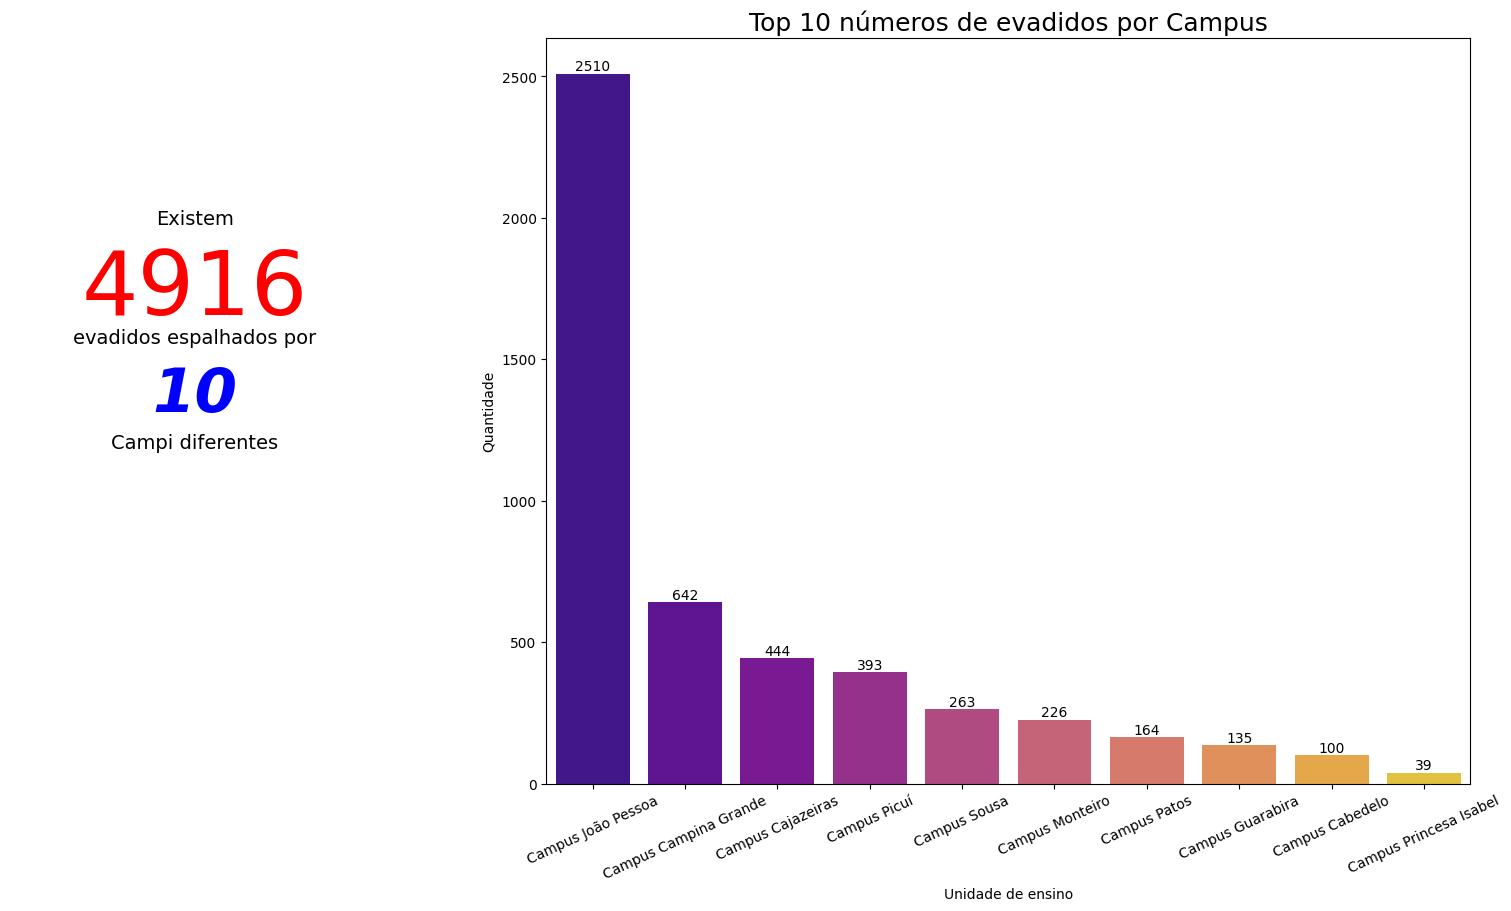

In [194]:
fig = plt.figure(constrained_layout=True,figsize=(15,9))


gs = GridSpec(1,3, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0, 1:3])

numero_de_campus = len(data['unidade_de_ensino'].unique())
numero_de_evadidos = len(evadidos_df)
ax1.text(0.40,0.75, 'Existem',fontsize=14, ha='center')
ax1.text(0.40,0.63,f'{numero_de_evadidos}', fontsize=64, color='red', ha='center')
ax1.text(0.40,0.59,'evadidos espalhados por', fontsize=14, ha='center')
ax1.text(0.40, 0.50, numero_de_campus, fontsize=44, ha='center', color='blue', style='italic', weight='bold')
ax1.text(0.40, 0.45, 'Campi diferentes', fontsize=14, ha='center')
ax1.axis('off')

ax2 = sns.countplot(x="unidade_de_ensino", data=evadidos_df, palette="plasma", order=evadidos_df['unidade_de_ensino'].value_counts().index[0:10])
ax2.set_title('Top 10 números de evadidos por Campus', size=18)

ax2.bar_label(ax2.containers[0])
plt.ylabel('Quantidade')
plt.xlabel('Unidade de ensino')
for tick in ax2.get_xticklabels():
    tick.set_rotation(25)
fig.show()

<h3 style="font-style:italic;color:#23272e">
    Quais Campi têm maiores percentuais de evadidos?
</h3>

In [195]:
def show_bars(subplot_value, x_value, hue_value, dataset):
    plt.subplot(subplot_value)
    ax = sns.countplot(x = x_value, hue = hue_value, data = dataset,palette='plasma')
   # ax.set(xlabel = x_value, ylabel = 'Quantidade e Percentual')
    x_value = x_value.replace('_',' ')
    x_value = x_value.replace(x_value[0],x_value[0].upper())
    ax.set_xlabel(x_value, fontsize=15)
    ax.set_ylabel("Quantidade e Percentual", fontsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.legend(fontsize=15)
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    for bars in ax.containers:
        for x, p in enumerate(bars):
            total = sum(xgroup[x] for xgroup in all_heights) 
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(f'{p.get_height()}\n{percentage}', (p.get_x() + p.get_width() / 2, p.get_height()), size=12, ha='center', va='bottom')
   

    x_ticks = [item.get_text() for item in ax.get_xticklabels()]
    if len(x_ticks[0]) > 10:
        ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(x_ticks, fontsize=12)

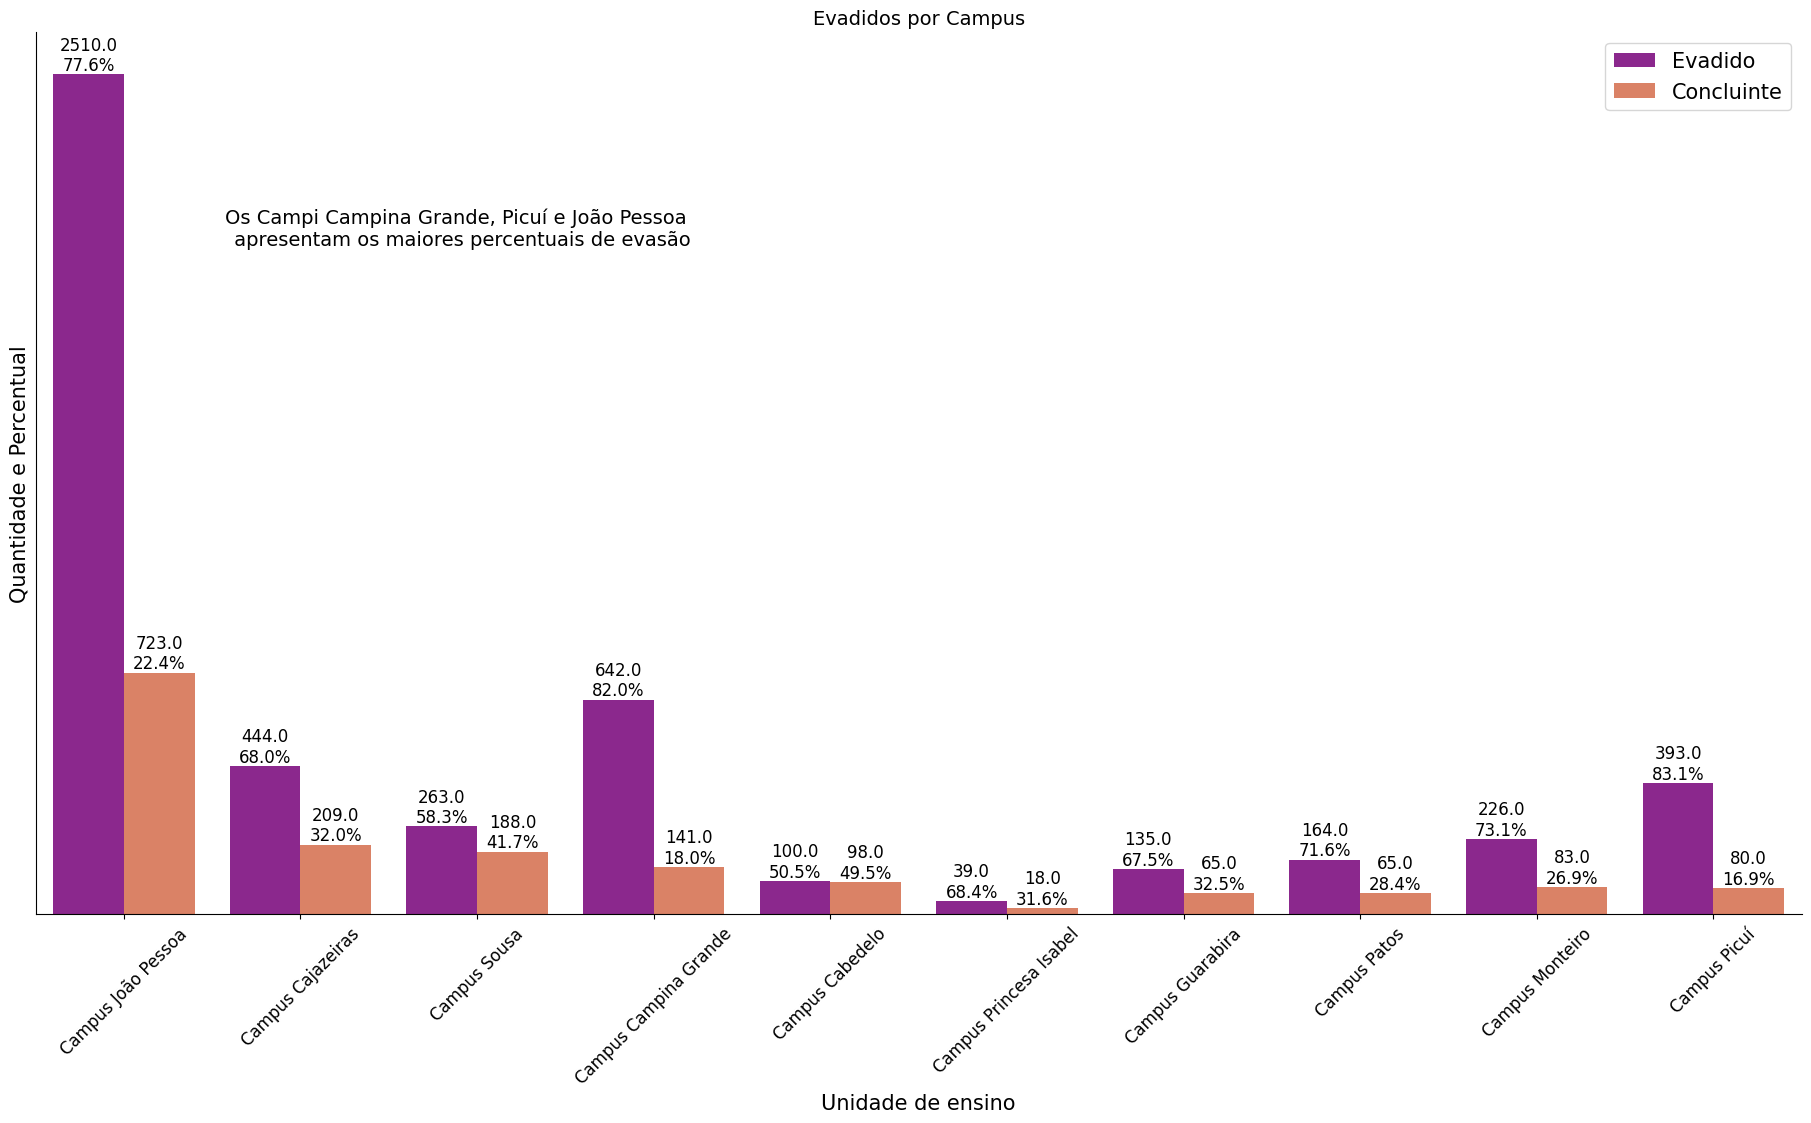

In [196]:
fig = plt.figure(constrained_layout=True,figsize=(18, 20))
show_bars(211,"unidade_de_ensino","categoria_de_situacao",data)
plt.text(1.90,2000,'Os Campi Campina Grande, Picuí e João Pessoa \n apresentam os maiores percentuais de evasão' ,fontsize=14, ha='center')
plt.title('Evadidos por Campus',fontsize=14)
plt.yticks([]) 
fig.show()

<h3 style="font-style:italic;color:#23272e">
    Como estão distribuídas as idades entre concluintes e evadidos?
</h3>

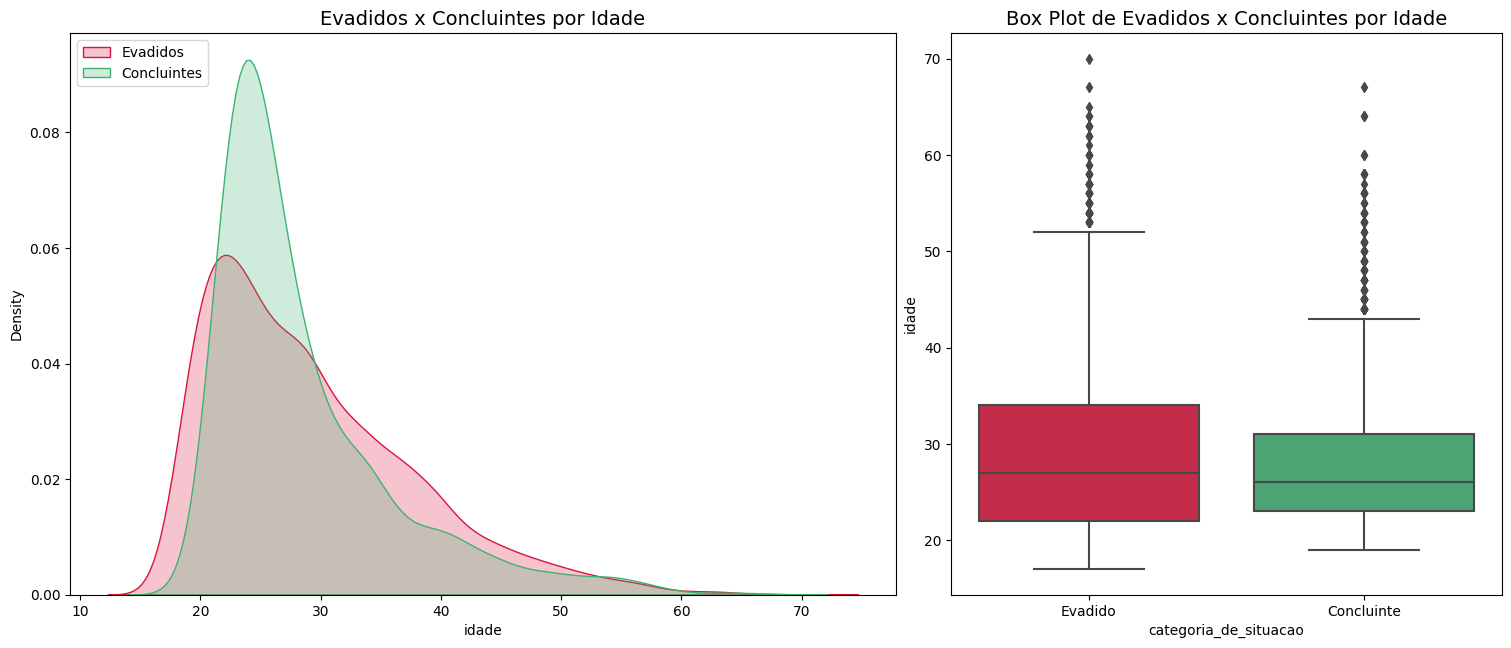

In [197]:
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

gs = GridSpec(2, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])

sns.kdeplot(data.query('categoria_de_situacao == "Evadido"')['idade'], ax=ax1,
             color='crimson', shade=True, label='Evadidos')
sns.kdeplot(data.query('categoria_de_situacao == "Concluinte"')['idade'], ax=ax1,
             color='mediumseagreen', shade=True, label='Concluintes')
ax1.set_title('Evadidos x Concluintes por Idade', size=14)
ax1.legend(loc='upper left')

sns.boxplot(x='categoria_de_situacao', y='idade', data=data, palette=['crimson', 'mediumseagreen'], ax=ax2)
ax2.set_title('Box Plot de Evadidos x Concluintes por Idade', size=14)
fig.show()

 ## ✔️ Insights
- Pelo gráfico kde vemos que na faixa entre 20 e 30 anos a densidade de concluintes é maior que a de evadidos e entra as faixas abaixo de 20 e acima de 30 até aproximadamente 50 anos a densidade de evadidos é maior;
- Pelo box plot nós vemos que as idades das pessoas que evadem são maiores do que as que concluem, além disso elas variam mais do que as do concluintes que têm valores mais próximos da mediana, contudo, a mediana destes evadidos ainda é bem próxima da dos concluintes.

<h3 style="font-style:italic;color:#23272e">
    Qual a média de idades entre concluintes e evadidos pelos Campus?
</h3>

In [50]:
media_idades_c = concluintes_df.groupby('unidade_de_ensino',as_index=False)['idade'].mean().sort_values('idade',ascending=False)
media_idades_c.columns = ['unidade_de_ensino','média_de_idade']
media_idades_c['média_de_idade'] = media_idades_c['média_de_idade'].apply(lambda x : round(x))

media_idades_e = evadidos_df.groupby('unidade_de_ensino',as_index=False)['idade'].mean().sort_values('idade',ascending=False)
media_idades_e.columns = ['unidade_de_ensino','média_de_idade']
media_idades_e['média_de_idade'] = media_idades_e['média_de_idade'].apply(lambda x : round(x))

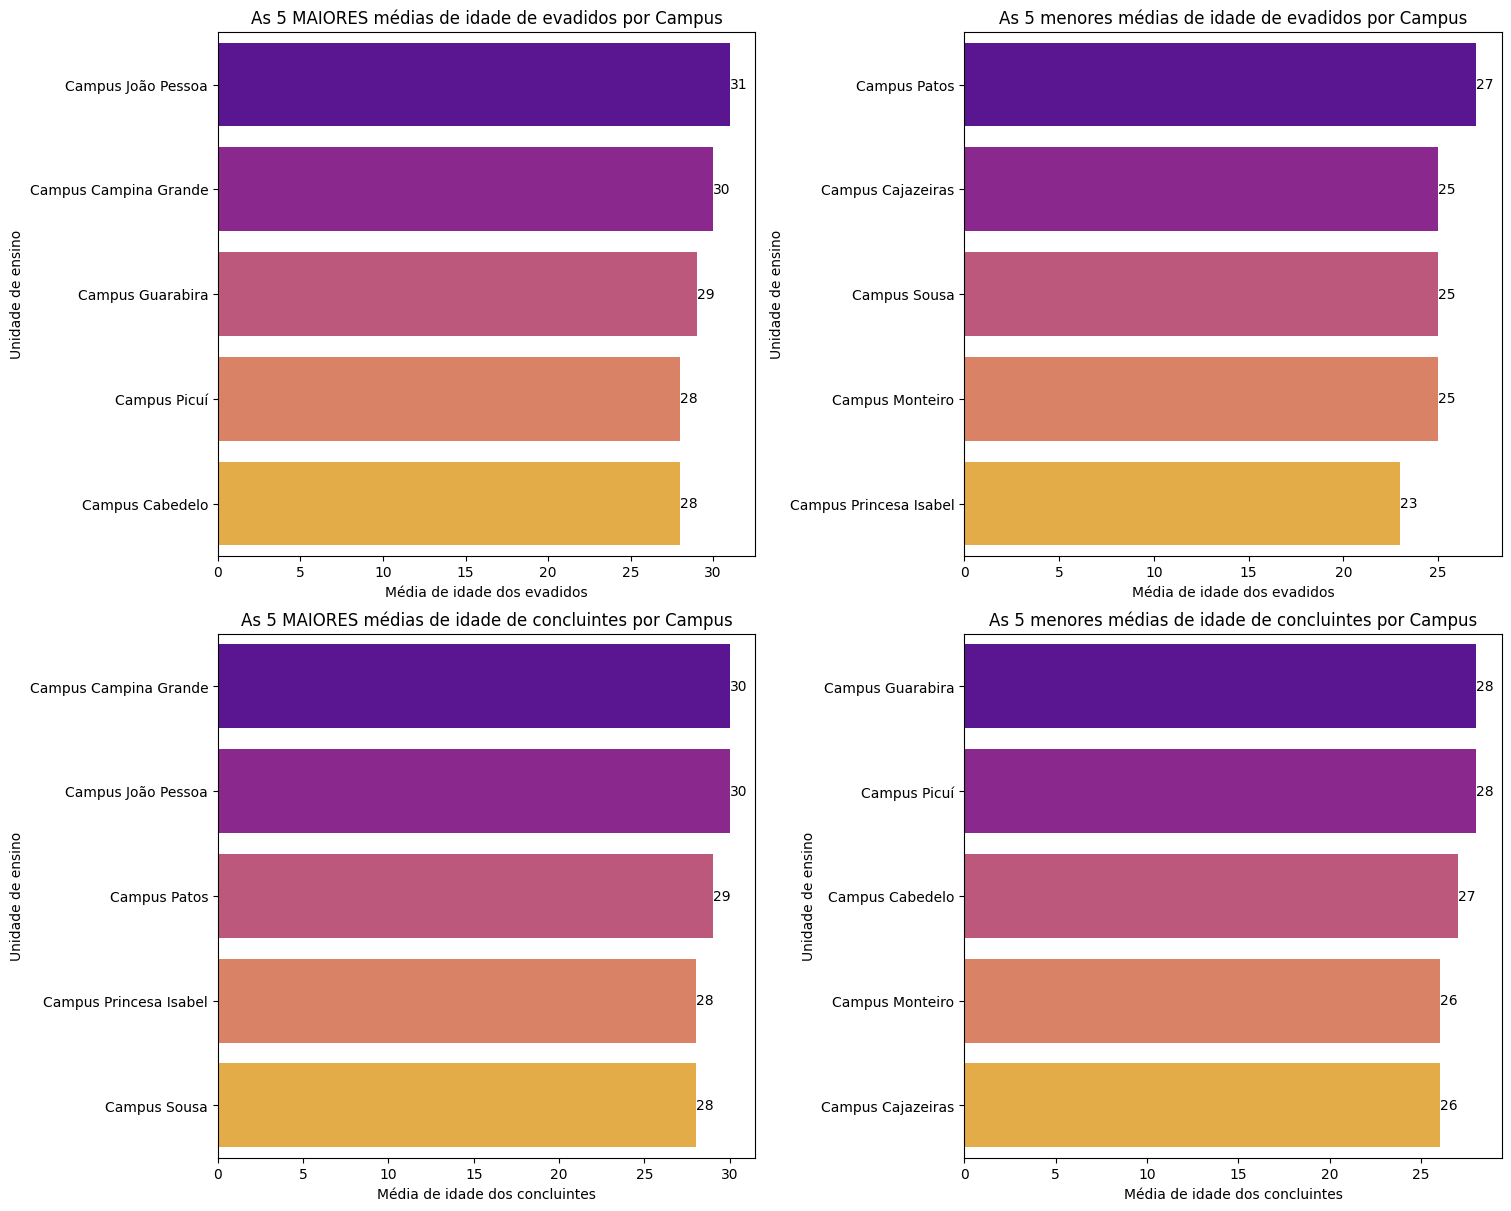

In [51]:
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,12))

sns.barplot(data=media_idades_e.head(), y = 'unidade_de_ensino', x = 'média_de_idade',ax=axs[0,0],palette='plasma')
axs[0,0].set_title('As 5 MAIORES médias de idade de evadidos por Campus')
axs[0,0].bar_label(axs[0,0].containers[0])
axs[0,0].set_ylabel('Unidade de ensino')
axs[0,0].set_xlabel('Média de idade dos evadidos')

sns.barplot(data=media_idades_e.tail(), y = 'unidade_de_ensino', x = 'média_de_idade',ax=axs[0,1],palette='plasma')
axs[0,1].set_title('As 5 menores médias de idade de evadidos por Campus')
axs[0,1].bar_label(axs[0,1].containers[0])
axs[0,1].set_ylabel('Unidade de ensino')
axs[0,1].set_xlabel('Média de idade dos evadidos')


sns.barplot(data=media_idades_c.head(), y = 'unidade_de_ensino', x = 'média_de_idade', ax=axs[1,0],palette='plasma')
axs[1,0].set_title('As 5 MAIORES médias de idade de concluintes por Campus')
axs[1,0].bar_label(axs[1,0].containers[0])
axs[1,0].set_ylabel('Unidade de ensino')
axs[1,0].set_xlabel('Média de idade dos concluintes')

sns.barplot(data=media_idades_c.tail(), y = 'unidade_de_ensino', x = 'média_de_idade', ax=axs[1,1],palette='plasma')
axs[1,1].set_title('As 5 menores médias de idade de concluintes por Campus')
axs[1,1].bar_label(axs[1,1].containers[0])
axs[1,1].set_ylabel('Unidade de ensino')
axs[1,1].set_xlabel('Média de idade dos concluintes')

fig.show()

<h3 style="font-style:italic;color:#23272e">
    Afinal, a idade possui alguma relação com a quantidade de evasões?
</h3>

In [198]:
df = pd.crosstab(data['idade'],data['categoria_de_situacao']).reset_index()
fig = px.scatter(df, x="idade", y="Evadido",size='Evadido', color='Evadido',trendline="ols")
fig.update_layout(title='<b>Evasão x Idade</b>',  yaxis_title="Qtde. Evadidos")
fig.update_coloraxes(showscale=False)


fig.add_annotation(
    x=49,
    y=300,
    text="Quando diminui-se a idade, <br> aumenta-se o número de evadidos",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False,
)
iplot(fig)
#fig.show()

<i>Porém, devemos considerar que a maior quantidade de alunos está para as idades menores, assim como a menor está para as maiores. Portanto, convém analisarmos de maneira percentual e verificar se o percentual de evasão aumenta de acordo com a idade.</i>

In [199]:
idades_alunos = pd.crosstab(data['idade'],data['categoria_de_situacao']).reset_index()
idades_alunos['total'] = idades_alunos['Concluinte']+idades_alunos['Evadido']
idades_alunos['% de evasão'] = round((idades_alunos['Evadido'] / idades_alunos['total'])*100,1)
idades_alunos['% de conclusão'] = round((idades_alunos['Concluinte'] / idades_alunos['total'])*100,1)
idades_alunos.head()

categoria_de_situacao,idade,Concluinte,Evadido,total,% de evasão,% de conclusão
0,17,0,7,7,100.0,0.0
1,18,0,107,107,100.0,0.0
2,19,2,233,235,99.1,0.9
3,20,12,280,292,95.9,4.1
4,21,78,301,379,79.4,20.6


<h3 style="font-style:italic;color:#23272e">
    O percentual de evasão é influenciado pela idade?
</h3>

In [200]:
fig = px.scatter(idades_alunos, x="idade", y="% de evasão",size='% de evasão', color='% de evasão',trendline="ols")

fig.update_layout(title='<b>Evasão x Idade - Percentual</b>',
    xaxis_title="Idade",
    yaxis_title="Percentual de evasão")

fig.update_coloraxes(showscale=False)


iplot(fig)

## ✔️ Insights

Vemos com clareza que a idade não tem influência no percentual de evadidos, ou seja, a quantidade de evasões só é maior nos mais jovens por conta de estes alunos jovens existirem em maior quantidade.

<h3 style="font-style:italic;color:#23272e">
    Qual a faixa etária com maior número de evasões?
</h3>

In [201]:
top_evadidos_idade = evadidos_df.groupby("faixa_etaria")["categoria_de_situacao"].count().reset_index(name='count').sort_values("count", ascending=False)
top_evadidos_idade

fig = px.bar(top_evadidos_idade[:10], x="count", y="faixa_etaria", orientation="h", text='count',color="faixa_etaria")
fig.update_layout(
    title="<b>Top 10 números de evadidos por faixa etária</b>",
    xaxis_title="Num. Evadidos",
    yaxis_title="Faixa etária",
    showlegend=False
)


fig.add_annotation(
    x=950,
    y=4.93,
    text="A faixa etária mais presente na evasão é entre 20 e 29 anos,<br> pois a maior parte dos dados de evadidos está concentrada nessa faixa",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False,
)


iplot(fig)

<h3 style="font-style:italic;color:#23272e">
    Qual o percentual de evasão em cada faixa etária?
</h3>

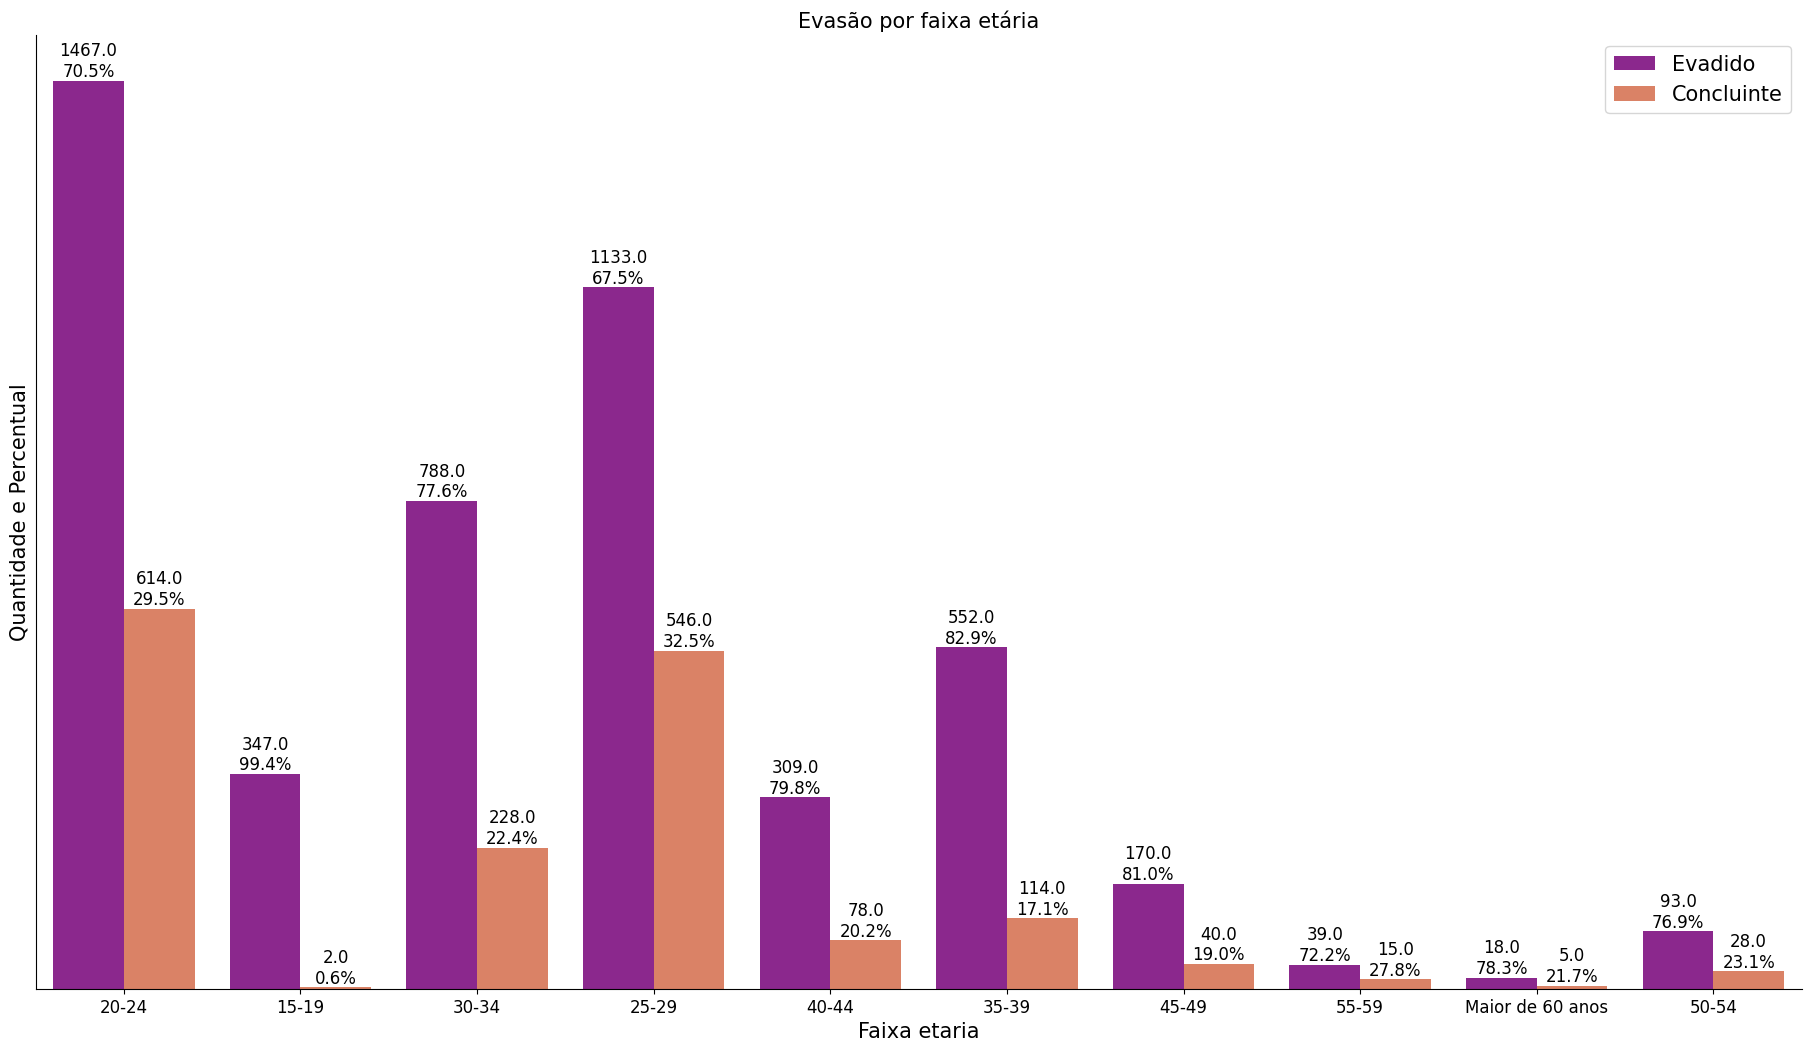

In [202]:
fig = plt.figure(constrained_layout=True,figsize=(18, 20))
show_bars(211,"faixa_etaria","categoria_de_situacao",data)
plt.title('Evasão por faixa etária',fontsize=15)
plt.yticks([])
plt.show()

## ✔️ Insights
* A faixa etária 15-19 apresenta o maior percentual de evasão, porém dificilmente iria se encontrar concluintes nessa faixa, dado que é uma idade em que os alunos ainda estão ingressando em seus cursos. E vimos anteriormente que a faixa 15-19 ocupava a quinta posição dentre os evadidos;

* Aproxidamente 83% das pessoas na faixa de 35-39 anos evadiram, sendo este o segundo maior percentual;

* Parece haver uma diminuição na quantidade de evadidos e concluintes ao aumentar-se a faixa etária, o que de fato acontece, pois observamos anteriormento que os números de evasões caíam ao aumentar a idade.

In [203]:
# observando a distribuição da renda
pd.value_counts(data['renda'])

0<RFP<=0,5      3428
0,5<RFP<=1,0    1763
1,0<RFP<=1,5     691
1,5<RFP<=2,5     397
2,5<RFP<=3,5     157
RFP>3,5          150
Name: renda, dtype: int64

<h3 style="font-style:italic;color:#23272e">
    Qual a renda com maior número de evasões?
</h3>

In [204]:
top_evadidos_renda = evadidos_df.groupby("renda")["categoria_de_situacao"].count().reset_index(name='count').sort_values("count",ascending=False)
top_evadidos_renda
# criando gráfico para melhor visualização
fig = px.bar(top_evadidos_renda[:6], x="count", y="renda", orientation="h", color="renda", text='count')
fig.update_layout(
    title="<b>Números de evadidos por Renda</b>",
    xaxis_title="Qtde. Evadidos",
    yaxis_title="Renda per Capita"
)



fig.add_annotation(
    x=1250,
    y=1.93,
    text="Dentre os evadidos, as rendas mais presentes estão entre 0<RFP<=0,5 e 0,5<RFP<=1,5",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False,
)
iplot(fig)

## Observando a proporção entre evadidos e concluintes por faixa etária

As proporções nos permitem avaliar os comportamentos isolados de cada grupo e nos ajuda a identificar tendências.

#### Analisando quais características estão presentes no grupo de maior quantidade de evasões (20-29)

A faixa etária de 20 a 29 anos conta com o maior número de alunos, assim como o maior número de evadidos. É importante analisar os alunos dessa faixa já que a maior parte das ocorrências estará nela. **Vamos analisar como os alunos de uma respectiva faixa evadem com relação aos seus cursos.**

In [205]:
evadidos_20_29 = evadidos_df.query('faixa_etaria=="20-24" | faixa_etaria=="25-29"')
concluintes_20_29 = concluintes_df.query('faixa_etaria=="20-24" | faixa_etaria=="25-29"')

In [206]:
df_20_29 = pd.concat([evadidos_20_29, concluintes_20_29])

In [207]:
df_20_29.head(3)

,cod_curso,nome_do_curso,carga_horaria_do_curso,eixo_tecnologico,fator_de_esforco_de_curso,tipo_de_curso,turno,codigo_da_matricula,codigo_do_ciclo_matricula,codigo_sistec,...,data_de_inicio_do_ciclo,data_de_fim_previsto_do_ciclo,vagas_ofertadas,mes_de_ocorrencia_da_situacao,renda,sexo,faixa_etaria,idade,cor,unidade_de_ensino
0,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral,92150225,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"0,5<RFP<=1,0",F,20-24,24,parda,Campus João Pessoa
1,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral,92145235,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"0,5<RFP<=1,0",M,20-24,23,branca,Campus João Pessoa
2,18,Engenharia Mecânica,4147,controle e processos industriais,1.07,bacharelado,integral,92145125,2645320,2809,...,26/08/2019,26/08/2024,41.0,01/01/2021,"RFP>3,5",M,20-24,21,parda,Campus João Pessoa


#### Adicionando uma coluna total e criando um novo df por meio de crosstab

In [208]:
df_20_29_grouped = pd.crosstab(df_20_29['nome_do_curso'],df_20_29['categoria_de_situacao']).reset_index()
df_20_29_grouped['total'] = df_20_29_grouped['Concluinte']+df_20_29_grouped['Evadido']
df_20_29_grouped.head()

categoria_de_situacao,nome_do_curso,Concluinte,Evadido,total
0,Administração,111,196,307
1,Agroecologia,68,150,218
2,Alimentos,19,27,46
3,Análise e Desenvolvimento de Sistemas,41,155,196
4,Automaçãoo Industrial,59,134,193


#### Agora é possível ver a quantidade de evadidos e concluintes e total de alunos em cada curso para a faixa 20-29

In [209]:
df_relative_total = df_20_29_grouped
df_relative_total['% de evadidos'] = (df_relative_total['Evadido']/df_relative_total['total']) * 100
df_relative_total.sort_values('% de evadidos',ascending=False)

categoria_de_situacao,nome_do_curso,Concluinte,Evadido,total,% de evadidos
11,Engenharia Mecânica,0,10,10,100.000000
13,Engenharia de Controle e Automação,0,22,22,100.000000
18,Informatica,1,19,20,95.000000
19,Letras - Língua Portuguesa,19,267,286,93.356643
26,Sistemas de Telecomunicações,6,64,70,91.428571
15,Geoprocessamento,12,72,84,85.714286
24,Redes de Computadores,27,135,162,83.333333
12,Engenharia de Computaçao,8,31,39,79.487179
3,Análise e Desenvolvimento de Sistemas,41,155,196,79.081633
14,Física,9,34,43,79.069767


Vamos ver estes resultados graficamente.

<h3 style="font-style:italic;color:#23272e">
    Na faixa 20-29 a concentração de evadidos é maior em quais cursos e tipos de cursos?
</h3>

In [210]:
fig = px.sunburst(df_20_29 , path=['tipo_de_curso', 'categoria_de_situacao'],color='tipo_de_curso',
                  color_discrete_map={'tecnologia':'black','bacharelado':'gold','licenciatura':'blue'})

fig.update_layout(title='<b>Percentual de evasão na faixa 20-29 por cursos e seus tipos</b>',height=570)
fig.update_traces(textinfo="label+percent parent")
iplot(fig)

## ✔️ Insight
Os maiores percentuais de evasões na faixa 20-29 está dentro dos cursos de licenciatura. E em ordem temos:

    1. Licenciatura
    2. Tecnologia
    3. Bacharelado

In [211]:
# fig = px.sunburst(evadidos_20_29, path=['tipo_de_curso', 'nome_do_curso'],color='tipo_de_curso',
#                   color_discrete_map={'tecnologia':'black','bacharelado':'gold','licenciatura':'blue'},labels={"count": "quantidade","labels":"curso"})

# fig.update_layout(title='<b>Concentração de evadidos na faixa 20-29 por cursos e seus tipos</b>',height=670)
# fig.update_traces(textinfo="label+value")
# iplot(fig)

<h3 style="font-style:italic;color:#23272e">
    Na faixa 20-29 o percentual de evadidos é maior em quais cursos de tecnologia?
</h3>

In [212]:
# df para uso posterior
df_30_49 = data[(data['faixa_etaria']=='30-34') | (data['faixa_etaria']=='35-39') | (data['faixa_etaria']=='40-44') | (data['faixa_etaria']=='45-49')]

In [213]:
# função para exibir gŕaficos sunburst
def show_sunburst(course_type,courses_names=[],age_group="20-29"):
    df = pd.DataFrame()
    if age_group == '20-29':
        rnge = len(courses_names)
        for x in range(rnge):
            new_df = df_20_29[df_20_29['nome_do_curso']==courses_names[x]]
            df = pd.concat([df,new_df])
    if age_group == '30-49':
        rnge = len(courses_names)
        for x in range(rnge):
            new_df = df_30_49[df_30_49['nome_do_curso']==courses_names[x]]
            df = pd.concat([df,new_df])

    fig = px.sunburst(df, path=['nome_do_curso', 'categoria_de_situacao'],color='nome_do_curso',labels={"count": "quantidade"})
    fig.update_traces(textinfo="label+percent parent")
    fig.update_layout(title=f'<b> Percentual de Evadidos x Concluintes na faixa {age_group} dos cursos de {course_type}</b>',height=670)
    fig
    iplot(fig)
    #fig.show()

In [214]:
show_sunburst('tecnologia',['Construção de Edifícios','Análise e Desenvolvimento de Sistemas','Agroecologia',
                           'Sistemas para Internet','Redes de Computadores','Automação Industrial'])

## ✔️ Insight
Os maiores percentuais de evasões na faixa 20-29 para os cursos de tecnologia são dos cursos de:

    1. redes de computadores
    2. análise e desenvolvimento de sistemas
    3. sistemas para internet

<h3 style="font-style:italic;color:#23272e">
    Na faixa 20-29 o percentual de evadidos é maior em quais cursos de bacharelado?
</h3>

In [215]:
show_sunburst('bacharelado',['Administração','Engenharia Eletrônica','Engenharia Civil','Engenharia de Computação',
                            'Engenharia de Controle e Automação'])

## ✔️ Insight
Os maiores percentuais de evasões na faixa 20-29 para os cursos de bacharelado são dos cursos de:

    1. engenharia de controle e automação
    2. engenharia eletrônica
    3. administração

<h3 style="font-style:italic;color:#23272e">
    Na faixa 20-29 o percentual de evadidos é maior em quais cursos de licenciatura?
</h3>

In [216]:
show_sunburst('licenciatura',['Matemática','Química','Ciências Biológicas',
                           'Física','Letras - Língua Portuguesa'])

## ✔️ Insight
Os maiores percentuais de evasões na faixa 20-29 para os cursos de bacharelado são dos cursos de:

    1. letras - língua portuguesa
    2. física
    3. química e ciências biológicas

## Analisando a faixa 30-49

<h3 style="font-style:italic;color:#23272e">
    Na faixa 30-49 a concentração de evadidos é maior em quais cursos e tipos de cursos?
</h3>

In [217]:
fig = px.sunburst(df_30_49, path=['tipo_de_curso', 'categoria_de_situacao'],color='tipo_de_curso',
                  color_discrete_map={'tecnologia':'black','bacharelado':'gold','licenciatura':'blue'})

fig.update_layout(title='<b>Percentual de evasão na faixa 30-49 por cursos e seus tipos</b>',height=570)
fig.update_traces(textinfo="label+percent parent")
iplot(fig)

## ✔️ Insight
O percentual de evasão difere da faixa 20-29, temos licenciatura com o maior percentual, seguido por bacharelado e tecnologia

<h3 style="font-style:italic;color:#23272e">
    Na faixa 30-49 o percentual de evadidos é maior em quais cursos de tecnologia?
</h3>

In [218]:
show_sunburst('tecnologia',['Construção de Edifícios','Análise e Desenvolvimento de Sistemas','Agroecologia',
                           'Sistemas para Internet','Redes de Computadores','Automação Industrial'],'30-49')

## ✔️ Insight
Os maiores percentuais de evasões na faixa 30-49 para os cursos de tecnologia são dos cursos de:

    1. redes de computadores
    2. sistemas para internet
    3. análise e desenvolvimento de sistemas e automação industrial

<h3 style="font-style:italic;color:#23272e">
    Na faixa 30-49 o percentual de evadidos é maior em quais cursos de bacharelado?
</h3>

In [219]:
show_sunburst('bacharelado',['Administração','Engenharia Eletrônica','Engenharia Civil','Engenharia de Computaçao',
                            'Engenharia de Controle e Automação'],'30-49')

## ✔️ Insight

Administração ocupa uma parte bem maior do que na faixa 20-29.

Os maiores percentuais de evasões na faixa 30-49 para os cursos de bacharelado são dos cursos de:

    1. engenharia eletrônica
    2. administração
    3. engenharia civil

<h3 style="font-style:italic;color:#23272e">
    Na faixa 30-49 o percentual de evadidos é maior em quais cursos de licenciatura?
</h3>

In [220]:
show_sunburst('licenciatura',['Matemática','Química','Ciências Biológicas',
                           'Física','Letras - Língua Portuguesa'],'30-49')

## ✔️ Insight

Letras ocupa uma parte bem maior do que na faixa 20-29.

Os maiores percentuais de evasões na faixa 30-49 para os cursos de licenciatura são dos cursos de:

    1. letras - língua portuguesa
    2. física
    3. química

<h3 style="font-style:italic;color:#23272e">
   Qual o tuno apresenta maior percentual de evadidos?
</h3>

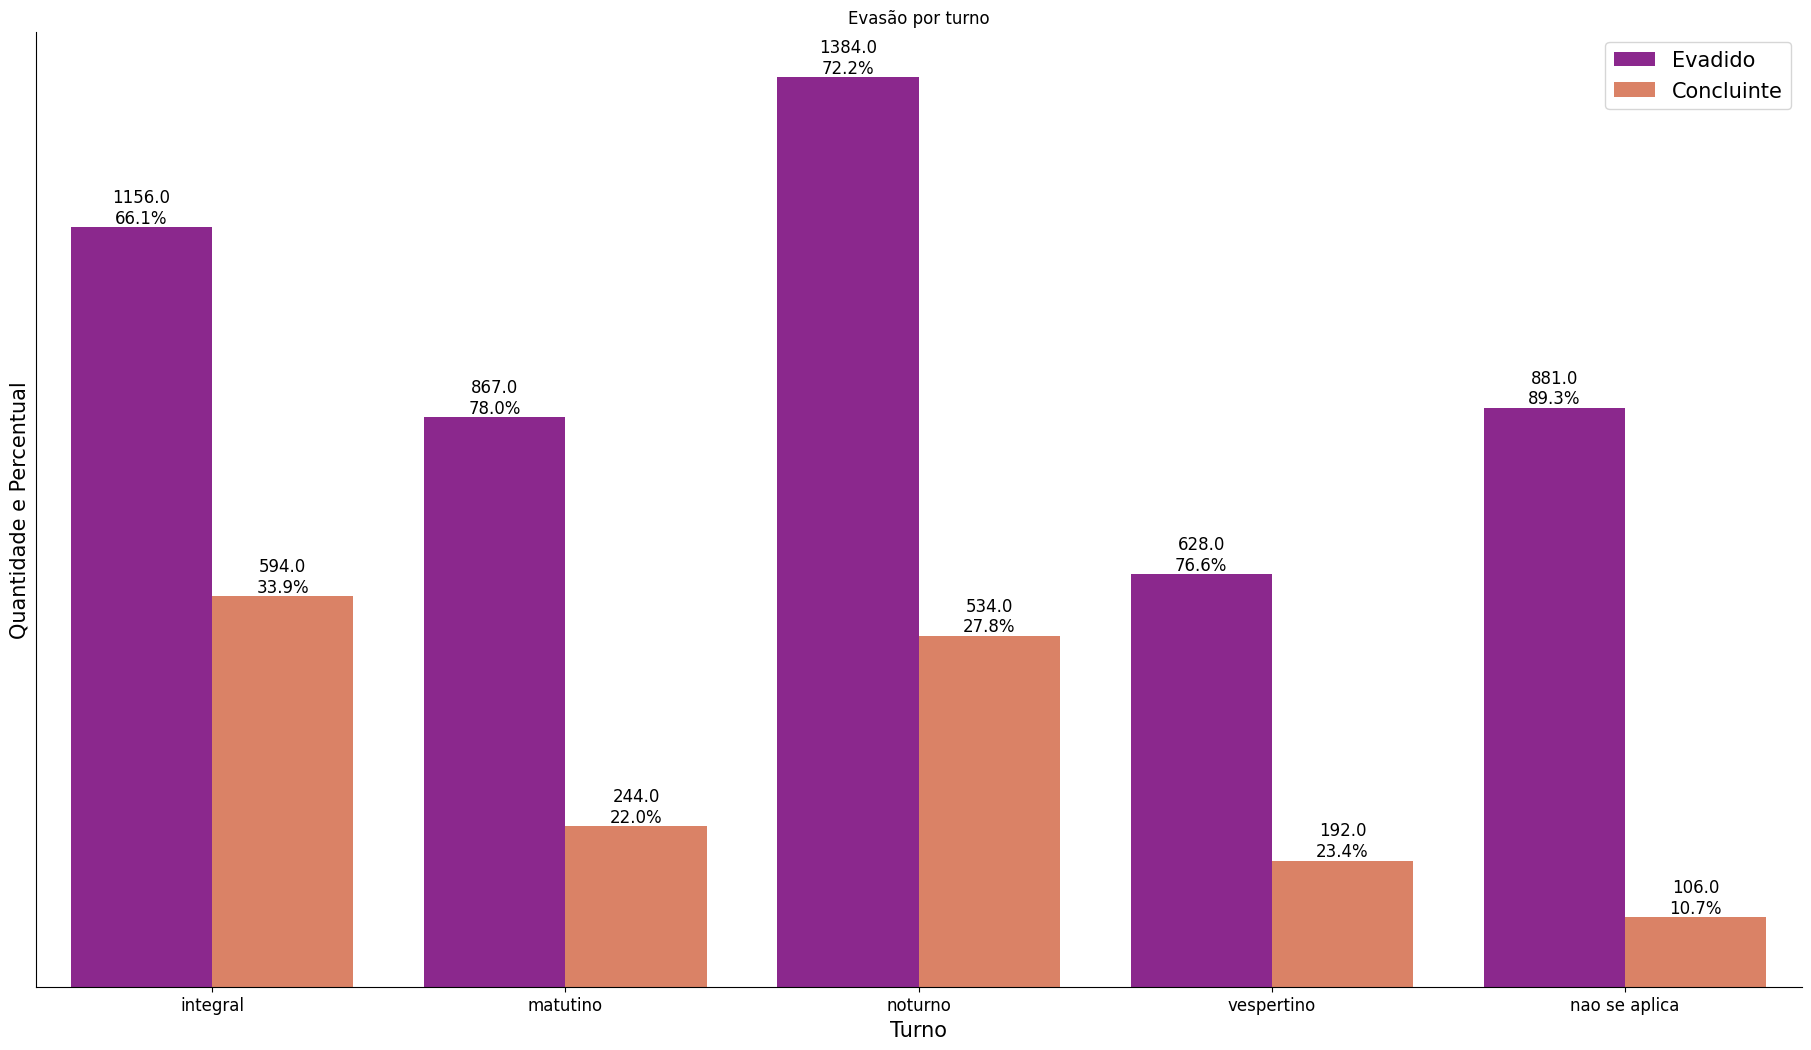

In [221]:
fig = plt.figure(constrained_layout=True,figsize=(18, 20))
show_bars(211,"turno","categoria_de_situacao",data)
plt.title('Evasão por turno')
plt.yticks([])
plt.show()

<h3 style="font-style:italic;color:#23272e">
   Qual o eixo tecnológico apresenta maior percentual de evadidos?
</h3>

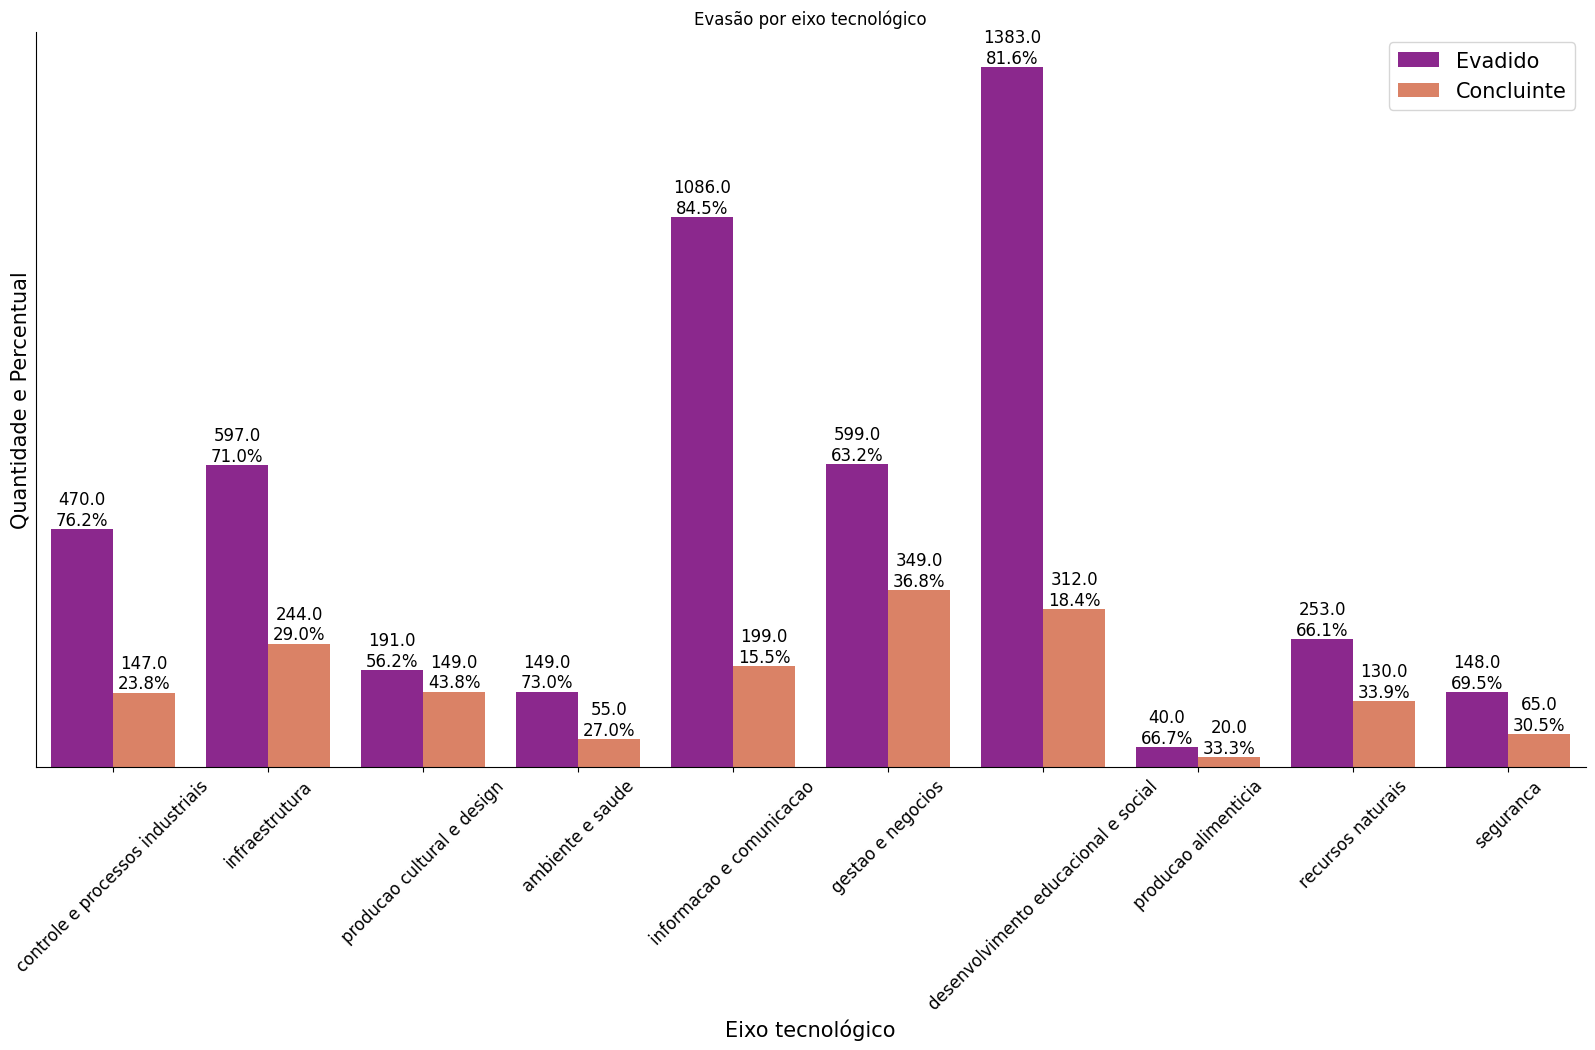

In [226]:
fig = plt.figure(figsize=(20, 21))
show_bars(211,"eixo_tecnologico","categoria_de_situacao",data)
plt.title('Evasão por eixo tecnológico')
plt.xlabel('Eixo tecnológico')
plt.yticks([])
plt.show()

## ✔️ Insights
- desenvolvimento educacional e social tem o maior percentual de evadidos (81.6%)
- produção cultural e design tem o maior percentual de concluintes (36.8%)

<h3 style="font-style:italic;color:#23272e">
   A carga horária influencia no número de evadidos?
</h3>

In [227]:
df = pd.crosstab(evadidos_df['carga_horaria_do_curso'],evadidos_df['categoria_de_situacao']).reset_index()
fig = px.scatter(df, x="carga_horaria_do_curso", y="Evadido",size='Evadido', color='Evadido',trendline="ols")
fig.update_layout(title='<b>Evasão x Carga Horária</b>',  yaxis_title="Qtde. Evadidos", )
fig.update_coloraxes(showscale=False)
iplot(fig)

- Não há correlação entre evasão e carga horária

<h3 style="font-style:italic;color:#23272e">
   O fator de esforço influencia no número de evadidos?
</h3>

In [228]:
new_df = pd.crosstab(evadidos_df['fator_de_esforco_de_curso'],df_20_29['categoria_de_situacao']).reset_index()
fig = px.scatter(new_df, x="fator_de_esforco_de_curso", y="Evadido",size='Evadido',color='Evadido',trendline="ols")
fig.update_layout(title='<b>Evasão x Fator de esforço</b>',  yaxis_title="Qtde. Evadidos", )
fig.update_coloraxes(showscale=False)
fig.add_annotation(
    x=1.05,
    y=500,
    text="Há uma correlação fraca entre o fator de esforço e a evasão",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False,
)
iplot(fig)

<h3 style="font-style:italic;color:#23272e">
   Qual cor apresenta maior percentual de evadidos?
</h3>

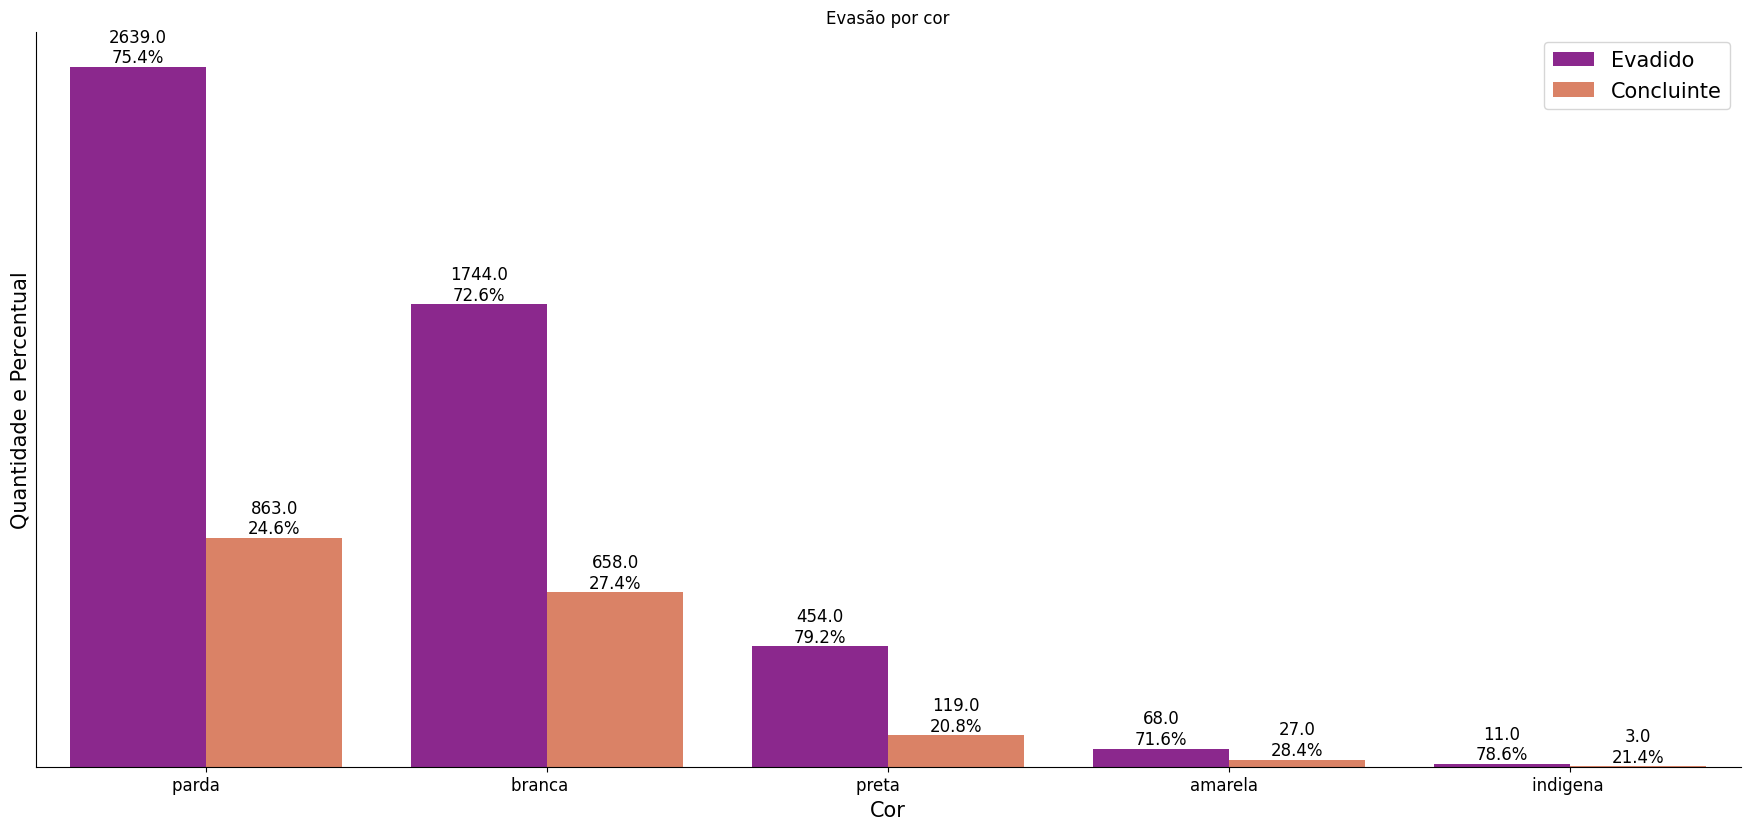

In [229]:
fig = plt.figure(constrained_layout=False,figsize=(22, 21))
show_bars(211,"cor","categoria_de_situacao",data)
plt.title('Evasão por cor')
plt.yticks([])
fig.show()

## ✔️ Insight
- A cores preta e parda apresentam um maior percentual de evadidos

<h3 style="font-style:italic;color:#23272e">
   Qual sexo apresenta maior percentual de evadidos?
</h3>

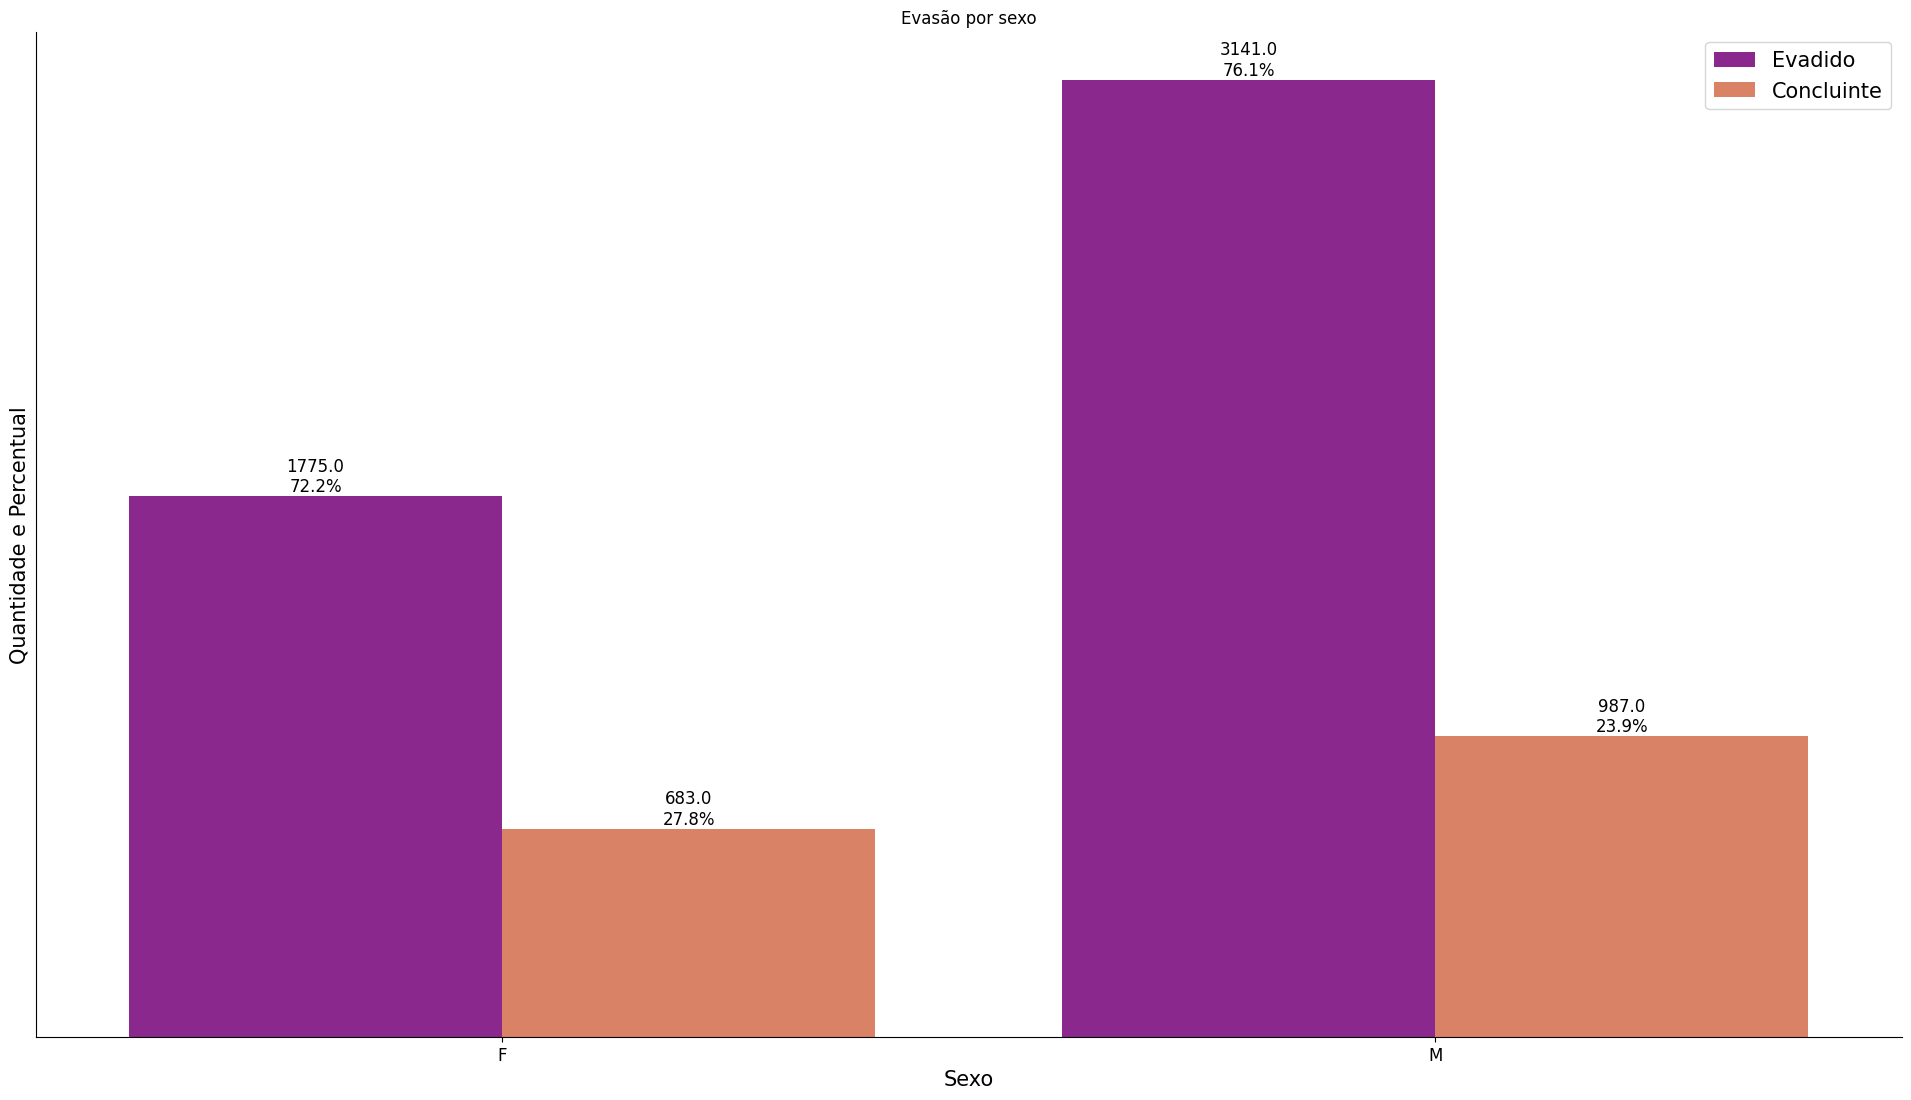

In [233]:
fig = plt.figure(constrained_layout=True,figsize=(19, 21))
show_bars(211,"sexo","categoria_de_situacao",data)
plt.title('Evasão por sexo')
plt.yticks([])
fig.show()

## ✔️ Insight
- O sexo masculino apresenta um maior percentual de evadidos